In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import where

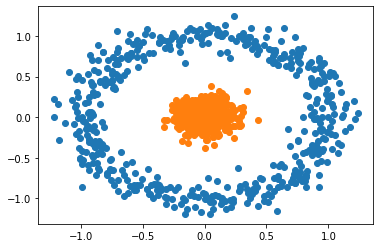

In [2]:
# generate 2d classification dataset
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1 ,factor=0.1)
# scatter plot, dots colored by class value
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(x[samples_ix, 0], x[samples_ix, 1])
pyplot.show()

In [3]:
# split into train and test
n_test = 500
trainx, testx = x[:n_test, :], x[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]

In [4]:
# define model
model = Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainx, trainy, validation_data=(testx, testy), epochs=300, verbose=0)

In [6]:
# evaluate the model
_, train_acc = model.evaluate(trainx, trainy, verbose=0)
_, test_acc = model.evaluate(testx, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


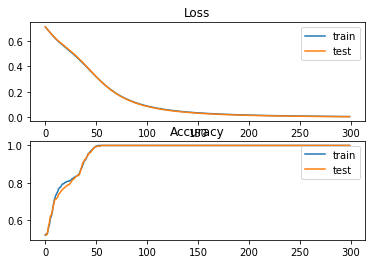

In [7]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Terminar de entender 

In [8]:
#Entrenamento para que tensoboard take data FORMA 1
import datetime,os
import tensorflow as tf 
from tensorboard.plugins.hparams import api as hp 
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,histogram_freq=1)
hparams_callback = hp.KerasCallback(log_dir,{
    'num_relu_units': 512,
    'dropout': 0.2
})

In [ ]:
!tensorboard dev upload --logdir logs \
    --name "Circle clasification" \
    --description "(optional) Simple comparison of several hyperparameters"

2023-02-19 16:37:46.424780: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 16:37:46.424918: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 16:37:46.424943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-19 16:37:48.695508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to c